# Homework 4

## Your Name Here (or your names here if you are pair programming)

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50
 
0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time
import psutil

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib widget

In [2]:
df = pd.read_csv('nyc-taxi-data.csv.bz2', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

###### 1. Add column headers

In [3]:
df.columns = ["medallion", "hack license", "pickup datetime", "dropoff datetime", 
     "trip time in secs", "trip distance", "pickup longitude", "pickup latitude",
     "dropoff longitude", "dropoff latitude", "payment type", "fare amount",
     "surcharge", "mta tax", "tip amount", "tolls amount", "total amount"]
df

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


###### 2. Drop rows with a travel distance < 1 mile and a total fare > $20

In [4]:
drop = df[(df['trip distance'] < 1) & (df['total amount'] > 20)].index
df.drop(drop, inplace = True)

###### 3. Replace missing values with the mean trip distance for each unique trip time in secs

In [5]:
zero_trip_distance = df[(df['trip distance'] == 0) & (df['trip time in secs'] > 0)].replace(0,np.nan)
zero_trip_distance['trip distance'] = zero_trip_distance['trip distance'].fillna(df.groupby('trip time in secs')['trip distance'].transform('mean'))
df.update(zero_trip_distance)

4. Update pickup and dropoff datetime to a datetime type instead of an object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49689 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   medallion          49689 non-null  object 
 1   hack license       49689 non-null  object 
 2   pickup datetime    49689 non-null  object 
 3   dropoff datetime   49689 non-null  object 
 4   trip time in secs  49689 non-null  int64  
 5   trip distance      49689 non-null  float64
 6   pickup longitude   49689 non-null  float64
 7   pickup latitude    49689 non-null  float64
 8   dropoff longitude  49689 non-null  float64
 9   dropoff latitude   49689 non-null  float64
 10  payment type       49689 non-null  object 
 11  fare amount        49689 non-null  float64
 12  surcharge          49689 non-null  float64
 13  mta tax            49689 non-null  float64
 14  tip amount         49689 non-null  float64
 15  tolls amount       49689 non-null  float64
 16  total amount       49689 no

In [7]:
df['pickup datetime'] = pd.to_datetime(df['pickup datetime'])
df['dropoff datetime'] = pd.to_datetime(df['dropoff datetime'])
df

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44000,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71000,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48000,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61000,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
5,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.25679,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79000,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41000,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63000,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04000,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49689 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   medallion          49689 non-null  object        
 1   hack license       49689 non-null  object        
 2   pickup datetime    49689 non-null  datetime64[ns]
 3   dropoff datetime   49689 non-null  datetime64[ns]
 4   trip time in secs  49689 non-null  int64         
 5   trip distance      49689 non-null  float64       
 6   pickup longitude   49689 non-null  float64       
 7   pickup latitude    49689 non-null  float64       
 8   dropoff longitude  49689 non-null  float64       
 9   dropoff latitude   49689 non-null  float64       
 10  payment type       49689 non-null  object        
 11  fare amount        49689 non-null  float64       
 12  surcharge          49689 non-null  float64       
 13  mta tax            49689 non-null  float64       
 14  tip amount 

## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

In [9]:
correlation= df[['trip distance', 'trip time in secs', 'total amount']]
correlation.corr()

,trip distance,trip time in secs,total amount
trip distance,1.000000,0.774924,0.913546
trip time in secs,0.774924,1.000000,0.815410
total amount,0.913546,0.815410,1.000000


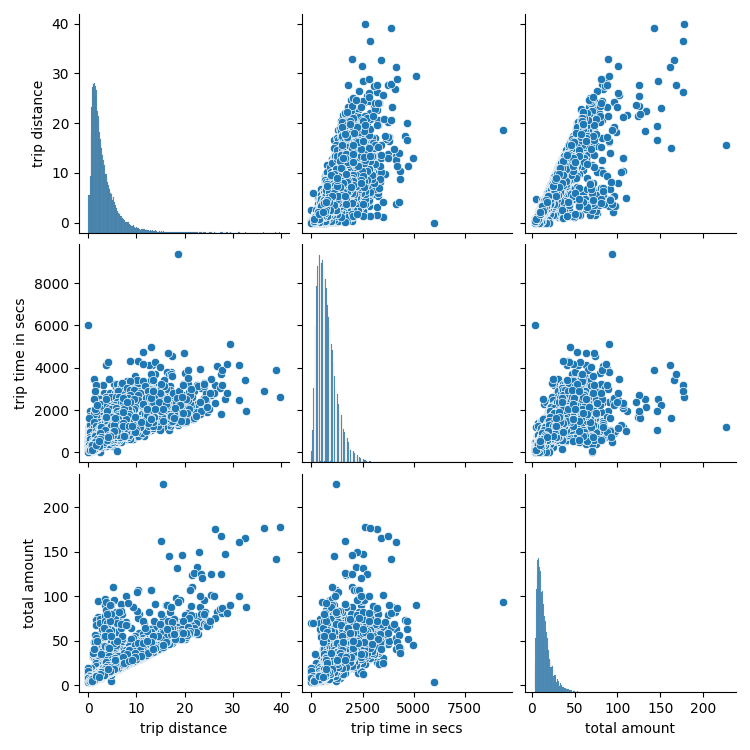

In [10]:
sns.pairplot(correlation)

We see positive correlations between `Trip Distance` and `Trip Time in Seconds ` of 0.774924. As the trip distance increases, the time of the trip tends to increase as well.

There is a positive correlation between `Trip Distance`and `Total Amount ` with a correlation of 0.913546. This indicates that as trip distance increase, the total fare amount will get more expensive.

Finally, we also see a positive correlation between `Trip Time in Seconds` and `Total Amount` with 0.815410 correlation, implying an increase in the total fare amount with increasing trip time.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [11]:
trip_distance = df['trip distance']
fare_amount = df['total amount']

In [12]:
my_X = np.vstack((trip_distance, )).T

In [13]:
reg = LinearRegression().fit(my_X, fare_amount)

print(f"Regression Coefficient: {reg.coef_}") 
print(f"Regression Intercept: {reg.intercept_}")

Regression Coefficient: [3.17637921]
Regression Intercept: 4.954967776867088


In [14]:
print(f"Linear regression equation: ")
print("Fare Amount = 4.954967776867088 + 3.17637921 * Trip Distance")

Linear regression equation: 
Fare Amount = 4.954967776867088 + 3.17637921 * Trip Distance


In [15]:
prediction = reg.predict([[3]])[0]

print(f"Predicted fare amount for a 3 mile trip is: ${prediction:.2f}.")

Predicted fare amount for a 3 mile trip is: $14.48.


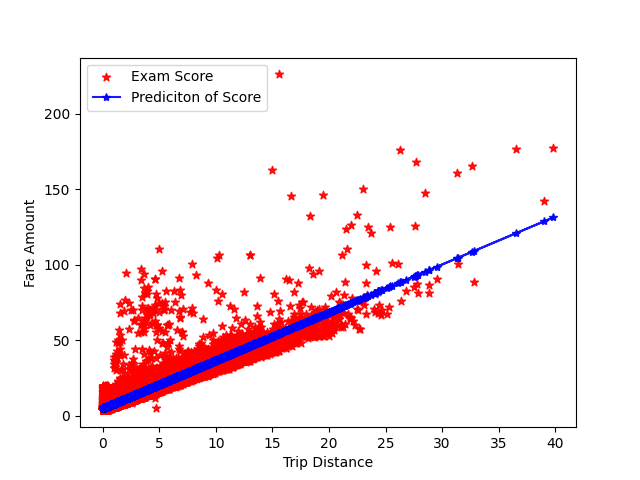

In [16]:
fig = plt.figure()
plt.scatter(trip_distance, fare_amount, c="red", alpha=0.9, marker='*',label="Exam Score")
plt.plot(trip_distance, reg.predict(my_X), c="blue", alpha=0.9, marker='*',label="Prediciton of Score")

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend(loc='upper left')
plt.show()

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49689 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   medallion          49689 non-null  object        
 1   hack license       49689 non-null  object        
 2   pickup datetime    49689 non-null  datetime64[ns]
 3   dropoff datetime   49689 non-null  datetime64[ns]
 4   trip time in secs  49689 non-null  int64         
 5   trip distance      49689 non-null  float64       
 6   pickup longitude   49689 non-null  float64       
 7   pickup latitude    49689 non-null  float64       
 8   dropoff longitude  49689 non-null  float64       
 9   dropoff latitude   49689 non-null  float64       
 10  payment type       49689 non-null  object        
 11  fare amount        49689 non-null  float64       
 12  surcharge          49689 non-null  float64       
 13  mta tax            49689 non-null  float64       
 14  tip amount 

In [18]:
X = df[['trip distance', 'trip time in secs']]
y = df['total amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train.values,y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [2.46169236 0.00539293]
Intercept: 3.0969850280063405


In [20]:
print(f"Regression Equation: total amount = {model.intercept_} + {model.coef_[0]} * trip distance + {model.coef_[1]} * trip time in secs")

Regression Equation: total amount = 3.0969850280063405 + 2.4616923586749597 * trip distance + 0.005392926197334401 * trip time in secs


In [21]:
prediction = model.predict([[3, 6]])[0]

print(f"Predicted fare amount for a 3 mile trip is: ${prediction:.2f}.")

Predicted fare amount for a 3 mile trip is: $10.51.


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

In [22]:
plt.rcParams['animation.html'] = 'jshtml'

In [23]:
x = df['trip distance']
y = df['total amount'] 

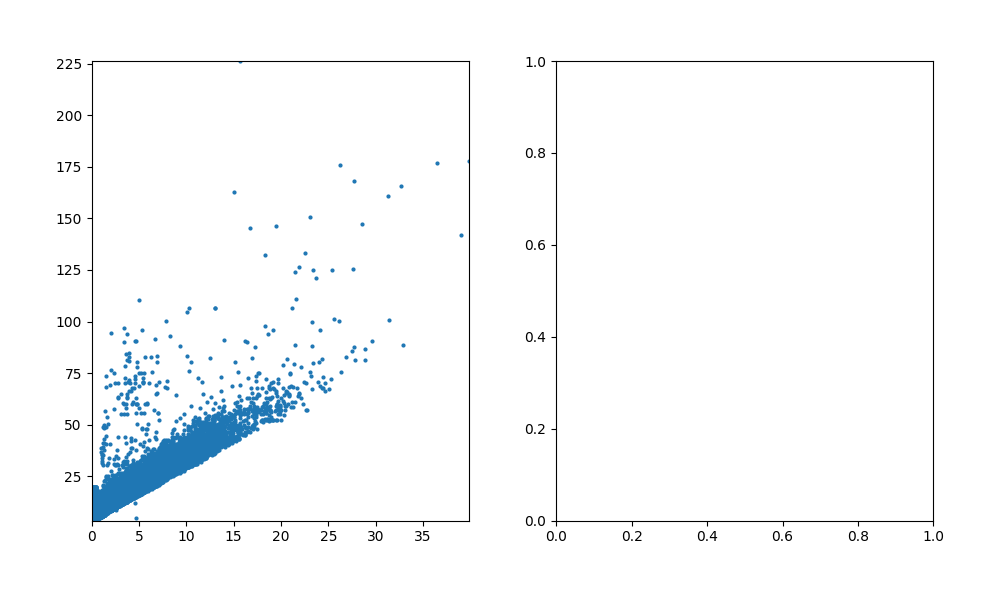

In [24]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)

Sample size 49689.0
Iteration No.= 0  m = 0.7139558645413467  b= 0.14854512266296366  Cost= 316.1869899092355
Iteration No.= 1  m = 1.2975166914885783  b= 0.2733535533503594  Cost= 219.48949107510128
Iteration No.= 2  m = 1.774391737557615  b= 0.3787265675764012  Cost= 154.73374908561263
Iteration No.= 3  m = 2.16397974886685  b= 0.4681835023410692  Cost= 111.36130614650874
Iteration No.= 4  m = 2.482152640269171  b= 0.5446039174456425  Cost= 82.30390196290745
Iteration No.= 5  m = 2.741896696607595  b= 0.6103439109437299  Cost= 62.829755593914655
Iteration No.= 6  m = 2.953837199349399  b= 0.6673312876765846  Cost= 49.77121987304279
Iteration No.= 7  m = 3.1266676726345324  b= 0.7171434255415824  Cost= 41.00774204575503
Iteration No.= 8  m = 3.267501089558464  b= 0.7610709851601924  Cost= 35.11973671257848
Iteration No.= 9  m = 3.3821572268340416  b= 0.8001700367088652  Cost= 31.156874380751397
Iteration No.= 10  m = 3.4753977764785913  b= 0.8353047097490818  Cost= 28.48296445085111
I

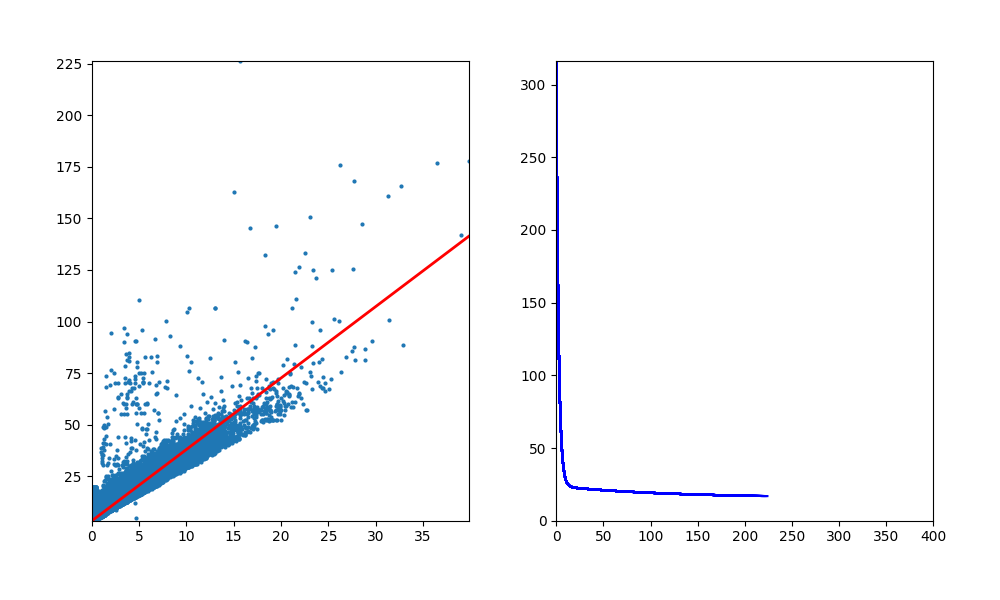

In [25]:
b_current = 0 
m_current = 0

learningRate = 0.01
num_iteration = 400 

precision = 0.01

previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)

oldCost=0

xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left=0, right=num_iteration)
ax2.set_ylim(bottom=0, top=initCost)

for i in range(num_iteration):
    
    y_prediction = m_current * x + b_current
    
    cost= (1/n) * sum (( y_prediction - y)**2)

    m_gradient = (1.0/n) * sum (x * (y_prediction - y))
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    if abs(cost - oldCost) <= precision:
        print("Stopped at iteration", i)
        break
    
    oldCost = cost
    
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals + b_current
    
    ax1.clear()
    ax1.set_xlim(left=np.min(x), right=np.max(x))
    ax1.set_ylim(bottom=np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals, '-', color='red', linewidth=2.0)
    
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')
    
    fig.canvas.draw()
    
    if i % 1 == 0:
        print("Iteration No.=", i, " m =", m_current, " b=", b_current, " Cost=", cost) 

print("m =", m_current, " b=", b_current)
plt.show()